# Analysis of the behavioral data of a virtual city free walk
This behavioral data contains the player's saved positions and rotations during the virtual city walk for both head and eye movements. Additionally, the "HON" variable contains the kind of object the player looked at.

## 1. Load data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import numpy as np
import dataframe_image as dfi
import scipy
from scipy.stats import zscore

df = pd.read_csv('BehavioralData/Behavior_new_02715e7a-5a68-471b-9e63-f056c5f0df81.csv')

df
# dfi.export(df.head(10), 'Images/behavioral_info.png')

,Unnamed: 0,valid,leftBlink,rightBlink,ETWTime,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,...,ETLoriginZ,ETLdirectionX,ETLdirectionY,ETLdirectionZ,HToriginX,HToriginY,HToriginZ,HTdirectionX,HTdirectionY,HTdirectionZ
0,0.000,1.0,0.0,0.0,58.655426,13.412971,12.306775,21.046938,0.942591,0.099437,...,-0.026742,0.086533,0.113068,0.989807,13.420355,12.303403,21.029396,0.969479,-0.037709,-0.242255
1,0.018,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
2,0.021,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
3,0.103,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
4,0.105,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163656,2806.947,1.0,0.0,0.0,2865.602500,527.395700,2.039758,593.381700,-0.465525,0.053999,...,-0.030184,0.140884,0.020569,0.989807,527.346741,2.038607,593.383911,-0.341758,0.026704,-0.939409
163657,2806.958,1.0,0.0,0.0,2865.613500,527.395750,2.039808,593.381840,-0.466018,0.055140,...,-0.030173,0.140656,0.021255,0.989822,527.346741,2.038620,593.384033,-0.342585,0.026923,-0.939102
163658,2806.969,1.0,0.0,0.0,2865.624800,527.395700,2.040012,593.382450,-0.388782,0.076406,...,-0.030771,0.054550,0.033539,0.997940,527.346741,2.038561,593.384155,-0.343687,0.027117,-0.938693
163659,2806.980,1.0,0.0,0.0,2865.635500,527.395000,2.039536,593.381300,-0.349532,0.084078,...,-0.029431,0.011353,0.037384,0.999222,527.346741,2.038495,593.384338,-0.344554,0.027179,-0.938373


In [5]:
df.columns

Index(['Unnamed: 0', 'valid', 'leftBlink', 'rightBlink', 'ETWTime',
       'ETWoriginX', 'ETWoriginY', 'ETWoriginZ', 'ETWdirectionX',
       'ETWdirectionY', 'ETWdirectionZ', 'HON', 'ETLoriginX', 'ETLoriginY',
       'ETLoriginZ', 'ETLdirectionX', 'ETLdirectionY', 'ETLdirectionZ',
       'HToriginX', 'HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY',
       'HTdirectionZ'],
      dtype='object')

### Preprocessing
When looking into the file, we found its dimensions are 163661 x 24, and it contains missing values which we should fix or delete.

In [24]:
# File contains 163661 x 24
df.info()
# Check for NaN
df.isnull().sum()
# dfi.export(df.info(), 'Images/behavioral_info.png')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163661 entries, 0 to 163660
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     163661 non-null  float64
 1   valid          163661 non-null  float64
 2   leftBlink      163661 non-null  float64
 3   rightBlink     163661 non-null  float64
 4   ETWTime        163661 non-null  float64
 5   ETWoriginX     163661 non-null  float64
 6   ETWoriginY     163661 non-null  float64
 7   ETWoriginZ     163661 non-null  float64
 8   ETWdirectionX  163661 non-null  float64
 9   ETWdirectionY  163661 non-null  float64
 10  ETWdirectionZ  163661 non-null  float64
 11  HON            163470 non-null  object 
 12  ETLoriginX     163442 non-null  float64
 13  ETLoriginY     163442 non-null  float64
 14  ETLoriginZ     163442 non-null  float64
 15  ETLdirectionX  163442 non-null  float64
 16  ETLdirectionY  163442 non-null  float64
 17  ETLdirectionZ  163442 non-nul

Unnamed: 0         0
valid              0
leftBlink          0
rightBlink         0
ETWTime            0
ETWoriginX         0
ETWoriginY         0
ETWoriginZ         0
ETWdirectionX      0
ETWdirectionY      0
ETWdirectionZ      0
HON              191
ETLoriginX       219
ETLoriginY       219
ETLoriginZ       219
ETLdirectionX    219
ETLdirectionY    219
ETLdirectionZ    219
HToriginX        229
HToriginY        229
HToriginZ        229
HTdirectionX     229
HTdirectionY     229
HTdirectionZ     229
dtype: int64

After fixing preprocessing, the file length is 163432 x 24

In [28]:
# Delete NaN values and reset index
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163432 entries, 0 to 163431
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     163432 non-null  float64
 1   valid          163432 non-null  float64
 2   leftBlink      163432 non-null  float64
 3   rightBlink     163432 non-null  float64
 4   ETWTime        163432 non-null  float64
 5   ETWoriginX     163432 non-null  float64
 6   ETWoriginY     163432 non-null  float64
 7   ETWoriginZ     163432 non-null  float64
 8   ETWdirectionX  163432 non-null  float64
 9   ETWdirectionY  163432 non-null  float64
 10  ETWdirectionZ  163432 non-null  float64
 11  HON            163432 non-null  object 
 12  ETLoriginX     163432 non-null  float64
 13  ETLoriginY     163432 non-null  float64
 14  ETLoriginZ     163432 non-null  float64
 15  ETLdirectionX  163432 non-null  float64
 16  ETLdirectionY  163432 non-null  float64
 17  ETLdirectionZ  163432 non-nul

Unnamed: 0       0
valid            0
leftBlink        0
rightBlink       0
ETWTime          0
ETWoriginX       0
ETWoriginY       0
ETWoriginZ       0
ETWdirectionX    0
ETWdirectionY    0
ETWdirectionZ    0
HON              0
ETLoriginX       0
ETLoriginY       0
ETLoriginZ       0
ETLdirectionX    0
ETLdirectionY    0
ETLdirectionZ    0
HToriginX        0
HToriginY        0
HToriginZ        0
HTdirectionX     0
HTdirectionY     0
HTdirectionZ     0
dtype: int64

## TODO:
- Delete first three rows. These values are recorded at the moment when the player switch from the validation to the actual game. (**did not work** becasue those are note the only values that differ. There are more)
- Perform z_scores to detect outliers in the dataset and get delete them. **DONE**, this worked nicely. However, the new dataframe excludes also the GameObject columns since stats library only allows int or floats, no strings.

### 2. Eye vs head tracking data

In [3]:
head_origin = df_clean[['HToriginX', 'HToriginY', 'HToriginZ']]
player_direction = df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']]

# head_origin
# Save to CSV
# player_origin.to_csv('/Users/johnmadrid/Google Drive/Osnabrück/WS 2021/NeuroBioPsuchology_2021/Thesis/Players_positions_directions/positionsTestFull.csv', index=False)

# player_direction.to_csv('/Users/johnmadrid/Google Drive/Osnabrück/WS 2021/NeuroBioPsuchology_2021/Thesis/Players_positions_directions/directionsTestFull.csv', index=False)

### 2.1 Total count distribution
The following exploratory analysis shows the range of the positions' origin and directions of the player during the virtual walk. The values are as expected. Namely, head's positions' origin on the y-axis stay mostly invariant and around zero because the player is sitting on a chair; x-and-y-axis values range between 500 and 650 approximately because they correspond to the limits of the area in the virtual city where participants were instructed to do the walk. Furthermore, the visualizations indicate that the head-tracking and the eye-tracking world data have similar distributions which seems to suggest we can use either of them when reconstructing the participant's virtual walk.


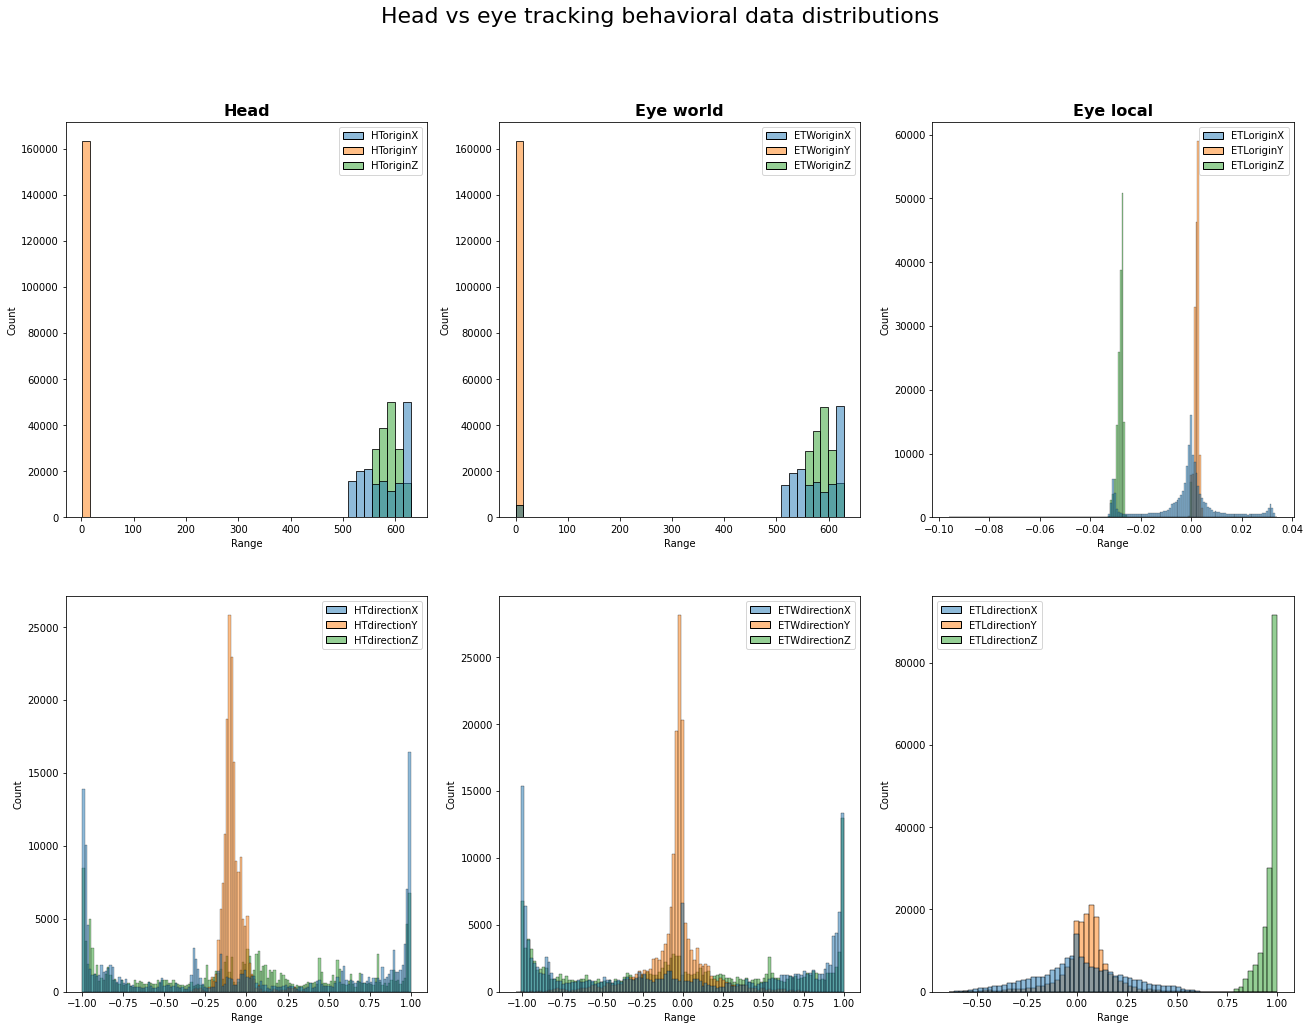

In [29]:
fig, ax = plt.subplots(2,3, figsize=(22, 16))

# head-tracking distribution
fig.suptitle("Head vs eye tracking behavioral data distributions", fontsize=22)
sns.histplot(df_clean[['HToriginX', 'HToriginY', 'HToriginZ']], ax=ax[0,0])
ax[0,0].set_xlabel('Range')
ax[0,0].set_ylabel('Count')

sns.histplot(df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']], ax=ax[1,0])
ax[1,0].set_xlabel('Range')
ax[1,0].set_ylabel('Count')

# eye-tracking local distribution
sns.histplot(df_clean[["ETWoriginX", "ETWoriginY", "ETWoriginZ"]], ax=ax[0,1])
ax[0,1].set_xlabel('Range')
ax[0,1].set_ylabel('Count')

sns.histplot(df_clean[["ETWdirectionX", "ETWdirectionY", "ETWdirectionZ"]], ax=ax[1,1])
ax[1,1].set_xlabel('Range')
ax[1,1].set_ylabel('Count')

# eye-tracking world distribution
sns.histplot(df_clean[["ETLdirectionX", "ETLdirectionY", "ETLdirectionZ"]], ax=ax[1,2])
ax[1,2].set_xlabel('Range')
ax[1,2].set_ylabel('Count')

sns.histplot(df_clean[["ETLoriginX", "ETLoriginY", "ETLoriginZ"]], ax=ax[0,2])
ax[0,2].set_xlabel('Range')
ax[0,2].set_ylabel('Count')


col_title = ['Head', 'Eye world', 'Eye local']
for i, ax in enumerate(ax.flatten()[:3]):
    ax.set_title(col_title[i], fontweight='bold', fontsize=16)
    i += 1

# fig.subplots_adjust(hspace=0.3)
# Save visualization/
# plt.savefig('Images/behavioral_distribution.eps', format='eps', dpi=1200)

In [121]:
df_clean[['HToriginX', 'ETWoriginX']].median()


HToriginX     579.412292
ETWoriginX    576.268450
dtype: float64

### 2.2 Origins' mean distribution

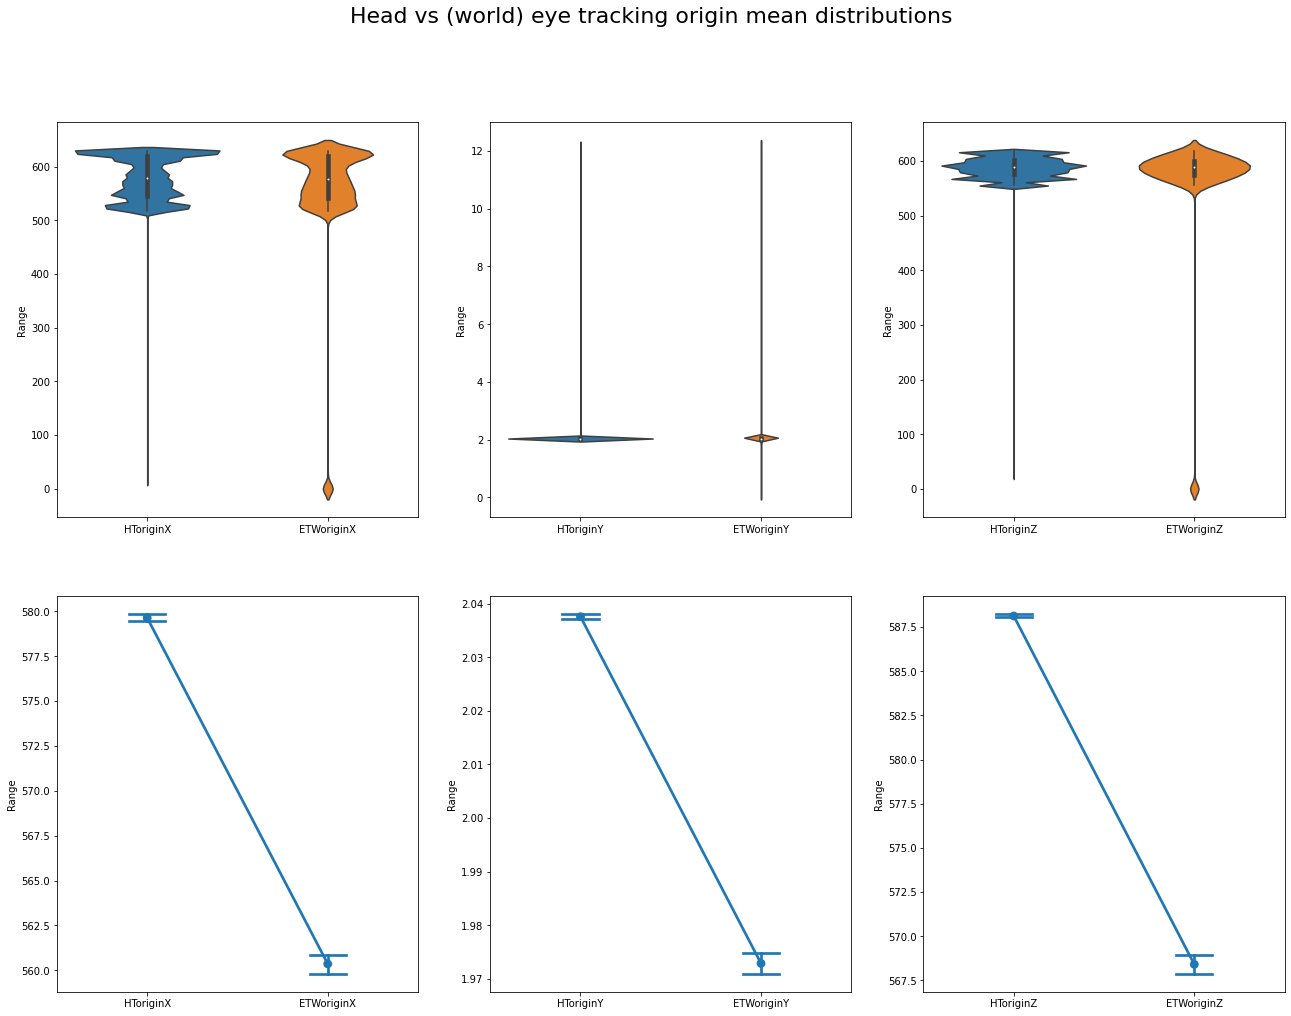

In [35]:
fig, ax = plt.subplots(2,3, figsize=(22, 16))

fig.suptitle("Head vs (world) eye tracking origin mean distributions", fontsize=22)

# mean distributions comparing head to eye tracing
sns.violinplot(data=df_clean[['HToriginX','ETWoriginX']], ax=ax[0,0])
ax[0,0].set_ylabel('Range')

sns.violinplot(data=df_clean[['HToriginY', 'ETWoriginY']], ax=ax[0,1])
ax[0,1].set_ylabel('Range')
sns.violinplot(data=df_clean[['HToriginZ','ETWoriginZ']], ax=ax[0,2])
ax[0,2].set_ylabel('Range')

# representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
sns.pointplot(data=df_clean[['HToriginX','ETWoriginX']], capsize=.2, ax=ax[1,0])
ax[1,0].set_ylabel('Range')
sns.pointplot(data=df_clean[['HToriginY', 'ETWoriginY']],capsize=.2, ax=ax[1,1])
ax[1,1].set_ylabel('Range')
sns.pointplot(data=df_clean[['HToriginZ','ETWoriginZ']], capsize=.2, ax=ax[1,2])
ax[1,2].set_ylabel('Range')

plt.savefig('Images/origin_mean_distribution.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


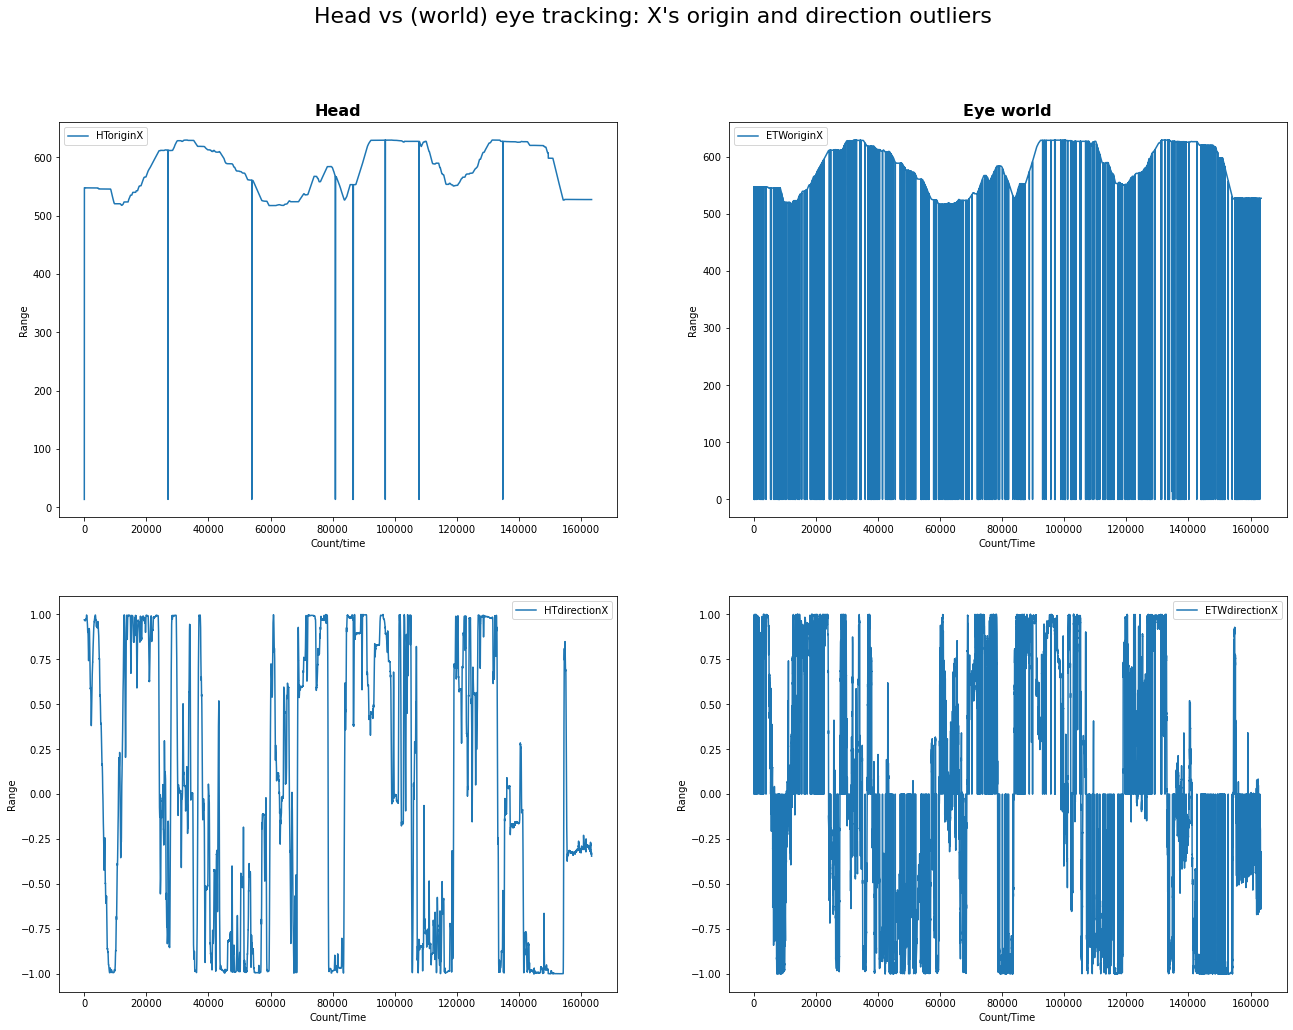

In [47]:
#these line plots show head and eye tracking data moving parallely
fig, ax = plt.subplots(2,2, figsize=(22, 16))

fig.suptitle("Head vs (world) eye tracking: X's origin and direction outliers", fontsize=22)
sns.lineplot(data=df_clean[['HToriginX']], ax=ax[0,0])
ax[0,0].set_xlabel('Count/time')
ax[0,0].set_ylabel('Range')
sns.lineplot(data=df_clean[['ETWoriginX']], ax=ax[0,1])
ax[0,1].set_xlabel('Count/Time')
ax[0,1].set_ylabel('Range')
sns.lineplot(data=df_clean[['HTdirectionX']], ax=ax[1,0])
ax[1,0].set_xlabel('Count/Time')
ax[1,0].set_ylabel('Range')
sns.lineplot(data=df_clean[['ETWdirectionX']], ax=ax[1,1])
ax[1,1].set_xlabel('Count/Time')
ax[1,1].set_ylabel('Range')

col_title = ['Head', 'Eye world']
for i, ax in enumerate(ax.flatten()[:2]):
    ax.set_title(col_title[i], fontweight='bold', fontsize=16)
    i += 1

plt.savefig('Images/x_origin_direction_outliers.eps', format='eps', dpi=1200)

<AxesSubplot:>

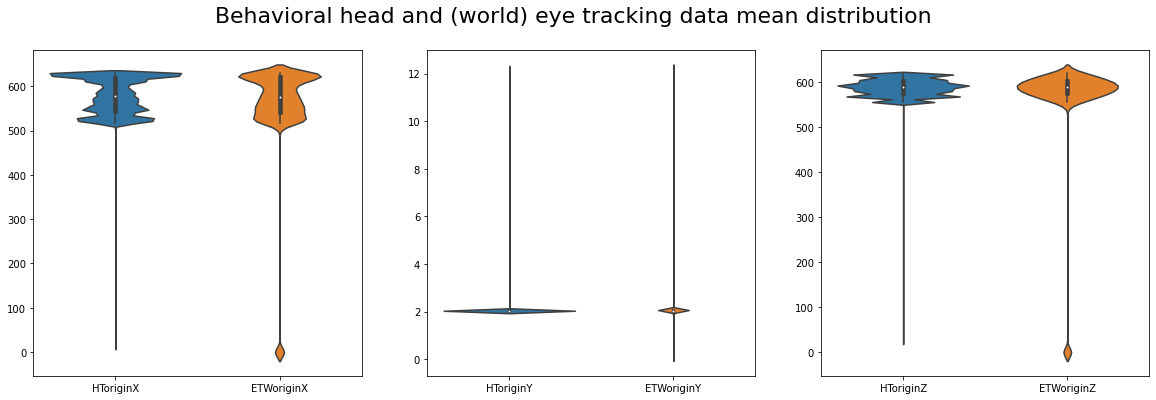

In [6]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

fig.suptitle("Behavioral head and (world) eye tracking data mean distribution", fontsize=22)

sns.violinplot(data=df_clean[['HToriginX','ETWoriginX']], ax=ax[0])
sns.violinplot(data=df_clean[['HToriginY', 'ETWoriginY']], ax=ax[1])
sns.violinplot(data=df_clean[['HToriginZ', 'ETWoriginZ']], ax=ax[2])


### 2.2 Directions' mean directions

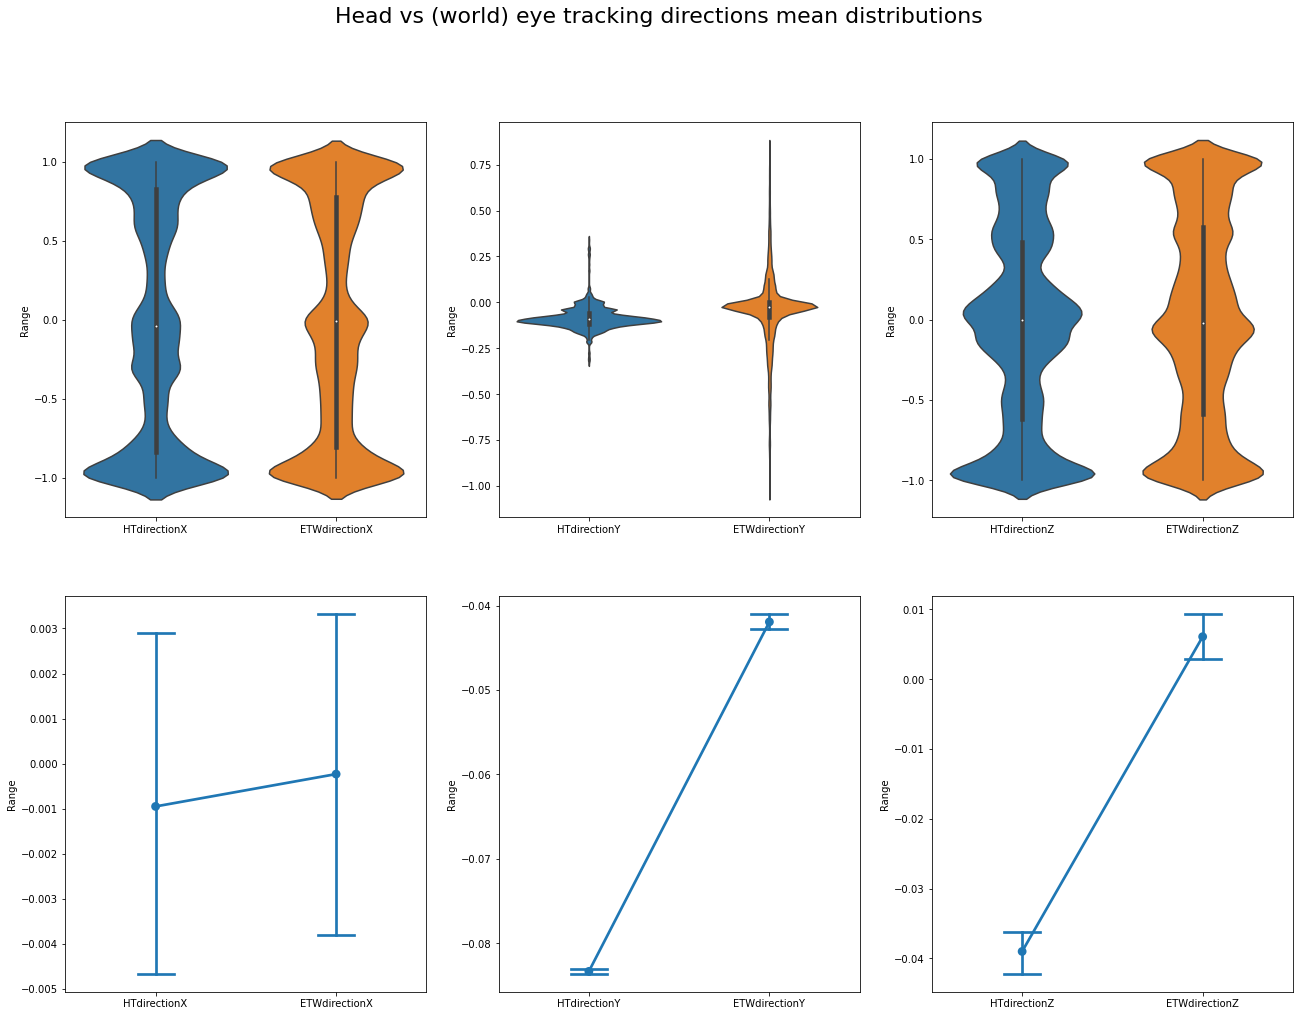

In [38]:
fig, ax = plt.subplots(2,3, figsize=(22, 16))

fig.suptitle("Head vs (world) eye tracking directions mean distributions", fontsize=22)

# mean distributions comparing head to eye tracing
sns.violinplot(data=df_clean[['HTdirectionX','ETWdirectionX']], ax=ax[0,0])
ax[0,0].set_ylabel('Range')
sns.violinplot(data=df_clean[['HTdirectionY', 'ETWdirectionY']], ax=ax[0,1])
ax[0,1].set_ylabel('Range')
sns.violinplot(data=df_clean[['HTdirectionZ','ETWdirectionZ']], ax=ax[0,2])
ax[0,2].set_ylabel('Range')

# representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
sns.pointplot(data=df_clean[['HTdirectionX','ETWdirectionX']], capsize=.2, ax=ax[1,0])
ax[1,0].set_ylabel('Range')
sns.pointplot(data=df_clean[['HTdirectionY', 'ETWdirectionY']],capsize=.2, ax=ax[1,1])
ax[1,1].set_ylabel('Range')
sns.pointplot(data=df_clean[['HTdirectionZ','ETWdirectionZ']], capsize=.2, ax=ax[1,2])
ax[1,2].set_ylabel('Range')

plt.savefig('Images/directions_mean_distribution.eps', format='eps', dpi=1200)

<AxesSubplot:>

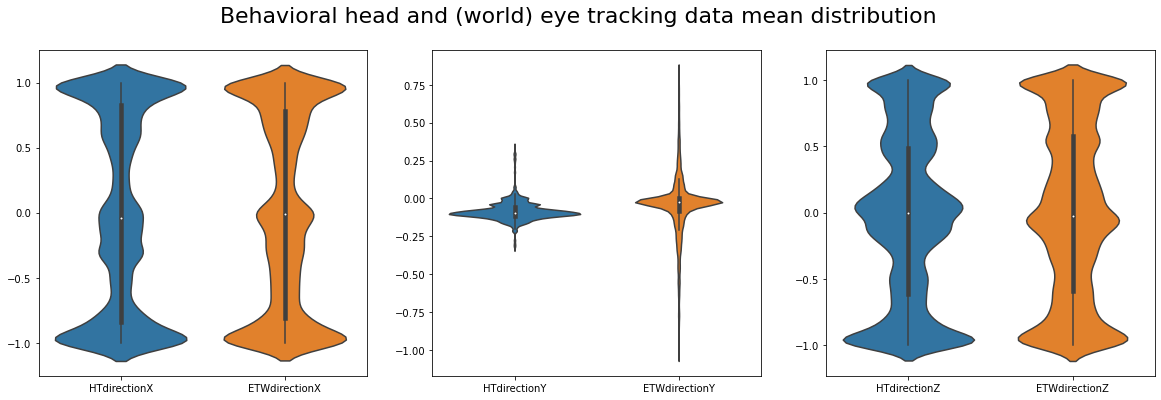

In [8]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

fig.suptitle("Behavioral head and (world) eye tracking data mean distribution", fontsize=22)

# Unlike a box plot, in which all plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
sns.violinplot(data=df_clean[['HTdirectionX','ETWdirectionX']], ax=ax[0])
sns.violinplot(data=df_clean[['HTdirectionY', 'ETWdirectionY']], ax=ax[1])
sns.violinplot(data=df_clean[['HTdirectionZ', 'ETWdirectionZ']], ax=ax[2])

In [ ]:
# Review if this should be deleted.
eyes_local_origin = df[["ETLoriginX", "ETLoriginY", "ETLoriginZ"]]

eyes_local_origin

In [ ]:
eyes_local_origin.boxplot()

eyes_local_origin.plot.hist()


In [9]:
eyes_local_direction = df_clean[['ETWoriginX', 'ETWoriginY', 'ETWoriginZ', 'ETWdirectionX',
       'ETWdirectionY', 'ETWdirectionZ']]

eyes_local_direction.head(50)

,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,ETWdirectionZ
0,13.412971,12.306775,21.046938,0.942591,0.099437,-0.325585
1,13.412885,12.306769,21.046755,0.942547,0.099320,-0.325718
2,13.412885,12.306769,21.046755,0.942547,0.099320,-0.325718
3,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
4,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
5,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
6,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
7,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
8,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
9,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898


## 3 Outliers
We noticed that for both the head and eye tracking data there are some outlier values in the position origin and direction. These values correspond to the first 3 rows and contain very low values which were recorded at the very beginning of the experiment. More specifically, these values were recorded when switching from the calibration location to the location in the virtual city where the virtual walk took place. Thus, we delete them to avoid inconsistencies.
After deleting these values, we can see that there are apparently more outlier values (See new mean distribution figure). One solution is to calculate zscores and remove all rows with outlier values. This, however, would result in data lose since most outliers (mostly zero values) appear to be in the eye and not in the head tracking data.

In [30]:
df_clean

,Unnamed: 0,valid,leftBlink,rightBlink,ETWTime,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,...,ETLoriginZ,ETLdirectionX,ETLdirectionY,ETLdirectionZ,HToriginX,HToriginY,HToriginZ,HTdirectionX,HTdirectionY,HTdirectionZ
0,0.000,1.0,0.0,0.0,58.655426,13.412971,12.306775,21.046938,0.942591,0.099437,...,-0.026742,0.086533,0.113068,0.989807,13.420355,12.303403,21.029396,0.969479,-0.037709,-0.242255
1,0.018,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
2,0.021,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
3,0.103,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
4,0.105,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163427,2806.947,1.0,0.0,0.0,2865.602500,527.395700,2.039758,593.381700,-0.465525,0.053999,...,-0.030184,0.140884,0.020569,0.989807,527.346741,2.038607,593.383911,-0.341758,0.026704,-0.939409
163428,2806.958,1.0,0.0,0.0,2865.613500,527.395750,2.039808,593.381840,-0.466018,0.055140,...,-0.030173,0.140656,0.021255,0.989822,527.346741,2.038620,593.384033,-0.342585,0.026923,-0.939102
163429,2806.969,1.0,0.0,0.0,2865.624800,527.395700,2.040012,593.382450,-0.388782,0.076406,...,-0.030771,0.054550,0.033539,0.997940,527.346741,2.038561,593.384155,-0.343687,0.027117,-0.938693
163430,2806.980,1.0,0.0,0.0,2865.635500,527.395000,2.039536,593.381300,-0.349532,0.084078,...,-0.029431,0.011353,0.037384,0.999222,527.346741,2.038495,593.384338,-0.344554,0.027179,-0.938373


In [31]:
# first attempt to delete initial outlier (inefficient because those are note the only ones)
# df_clean2 = df_clean.drop([0,1,2]).reset_index(drop=True)
# df_clean2
# df_clean2[['HToriginY']].max()
# df_clean2[['HToriginY']].min()

# second attempt to remove them
# d  = df_clean.head(500)

<AxesSubplot:>

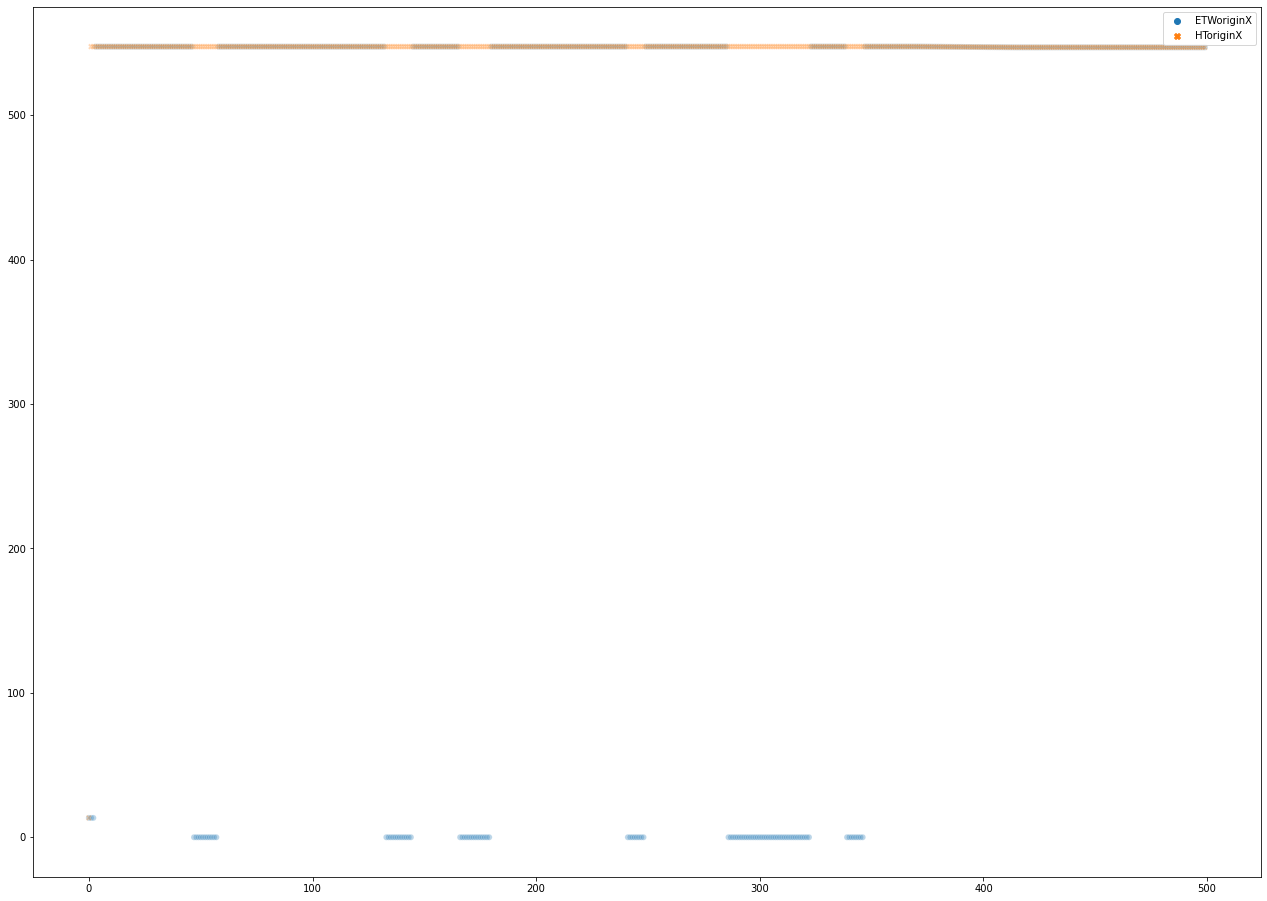

In [33]:
fig, ax = plt.subplots(1,1, figsize=(22, 16))
d = df_clean[['ETWoriginX', 'HToriginX']].head(500)
sns.scatterplot(data=d, alpha=0.3)

Explore for HTorigin values bigger than initial 547.551270 in player_direction

In [34]:
#  calculating zscores (https://www.adamsmith.haus/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python)
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm
df = df_clean[['ETWoriginX', 'ETWoriginY', 'ETWoriginZ','ETWdirectionX','ETWdirectionY', 'ETWdirectionZ','HToriginX','HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY', 'HTdirectionZ']]
z_scores = scipy.stats.zscore(df)

z_scores

array([[-4.91106137, 26.98562179, -5.10111506, ...,  1.26985742,
         0.69840347, -0.3200719 ],
       [-4.91106214, 26.98560612, -5.10111676, ...,  1.26982123,
         0.69934369, -0.32026178],
       [-4.91106214, 26.98560612, -5.10111676, ...,  1.26982123,
         0.69934369, -0.32026178],
       ...,
       [-0.29594691,  0.17528499,  0.23277226, ..., -0.44848399,
         1.69060713, -1.41678488],
       [-0.29595319,  0.17404198,  0.23276154, ..., -0.44961879,
         1.69154701, -1.41628215],
       [-0.29595634,  0.17470527,  0.232769  , ..., -0.45083182,
         1.69192267, -1.41574413]])

In [35]:
abs_zscores = np.abs(z_scores)

filtered_data = (abs_zscores < 3).all(axis = 1)


filtered_df = df_clean[filtered_data]
filtered_df.reset_index(drop=True)

,Unnamed: 0,valid,leftBlink,rightBlink,ETWTime,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,...,ETLoriginZ,ETLdirectionX,ETLdirectionY,ETLdirectionZ,HToriginX,HToriginY,HToriginZ,HTdirectionX,HTdirectionY,HTdirectionZ
0,0.103,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
1,0.105,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
2,0.106,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
3,0.107,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
4,0.108,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151734,2806.947,1.0,0.0,0.0,2865.602500,527.39570,2.039758,593.38170,-0.465525,0.053999,...,-0.030184,0.140884,0.020569,0.989807,527.346741,2.038607,593.383911,-0.341758,0.026704,-0.939409
151735,2806.958,1.0,0.0,0.0,2865.613500,527.39575,2.039808,593.38184,-0.466018,0.055140,...,-0.030173,0.140656,0.021255,0.989822,527.346741,2.038620,593.384033,-0.342585,0.026923,-0.939102
151736,2806.969,1.0,0.0,0.0,2865.624800,527.39570,2.040012,593.38245,-0.388782,0.076406,...,-0.030771,0.054550,0.033539,0.997940,527.346741,2.038561,593.384155,-0.343687,0.027117,-0.938693
151737,2806.980,1.0,0.0,0.0,2865.635500,527.39500,2.039536,593.38130,-0.349532,0.084078,...,-0.029431,0.011353,0.037384,0.999222,527.346741,2.038495,593.384338,-0.344554,0.027179,-0.938373


In [36]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151739 entries, 3 to 163431
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     151739 non-null  float64
 1   valid          151739 non-null  float64
 2   leftBlink      151739 non-null  float64
 3   rightBlink     151739 non-null  float64
 4   ETWTime        151739 non-null  float64
 5   ETWoriginX     151739 non-null  float64
 6   ETWoriginY     151739 non-null  float64
 7   ETWoriginZ     151739 non-null  float64
 8   ETWdirectionX  151739 non-null  float64
 9   ETWdirectionY  151739 non-null  float64
 10  ETWdirectionZ  151739 non-null  float64
 11  HON            151739 non-null  object 
 12  ETLoriginX     151739 non-null  float64
 13  ETLoriginY     151739 non-null  float64
 14  ETLoriginZ     151739 non-null  float64
 15  ETLdirectionX  151739 non-null  float64
 16  ETLdirectionY  151739 non-null  float64
 17  ETLdirectionZ  151739 non-nul

Exploring means distributions for head vs eye tracking position origins after zscores

In [75]:
def plot_origin_mean(df, suptitle="", save_name=""):
    fig, ax = plt.subplots(2,3, figsize=(22, 16))


    fig.suptitle(suptitle, fontsize=22)

    # mean distributions comparing head to eye tracing
    sns.violinplot(data=df[['HToriginX','ETWoriginX']], ax=ax[0,0])
    ax[0,0].set_ylabel('Range')

    sns.violinplot(data=df[['HToriginY', 'ETWoriginY']], ax=ax[0,1])
    ax[0,1].set_ylabel('Range')
    sns.violinplot(data=df[['HToriginZ','ETWoriginZ']], ax=ax[0,2])
    ax[0,2].set_ylabel('Range')

    # representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
    sns.pointplot(data=df[['HToriginX','ETWoriginX']], capsize=.2, ax=ax[1,0])
    ax[1,0].set_ylabel('Range')
    sns.pointplot(data=df[['HToriginY', 'ETWoriginY']],capsize=.2, ax=ax[1,1])
    ax[1,1].set_ylabel('Range')
    sns.pointplot(data=df[['HToriginZ','ETWoriginZ']], capsize=.2, ax=ax[1,2])
    ax[1,2].set_ylabel('Range')

    # plt.savefig("Images/" + save_name + ".eps", format='eps', dpi=1200)

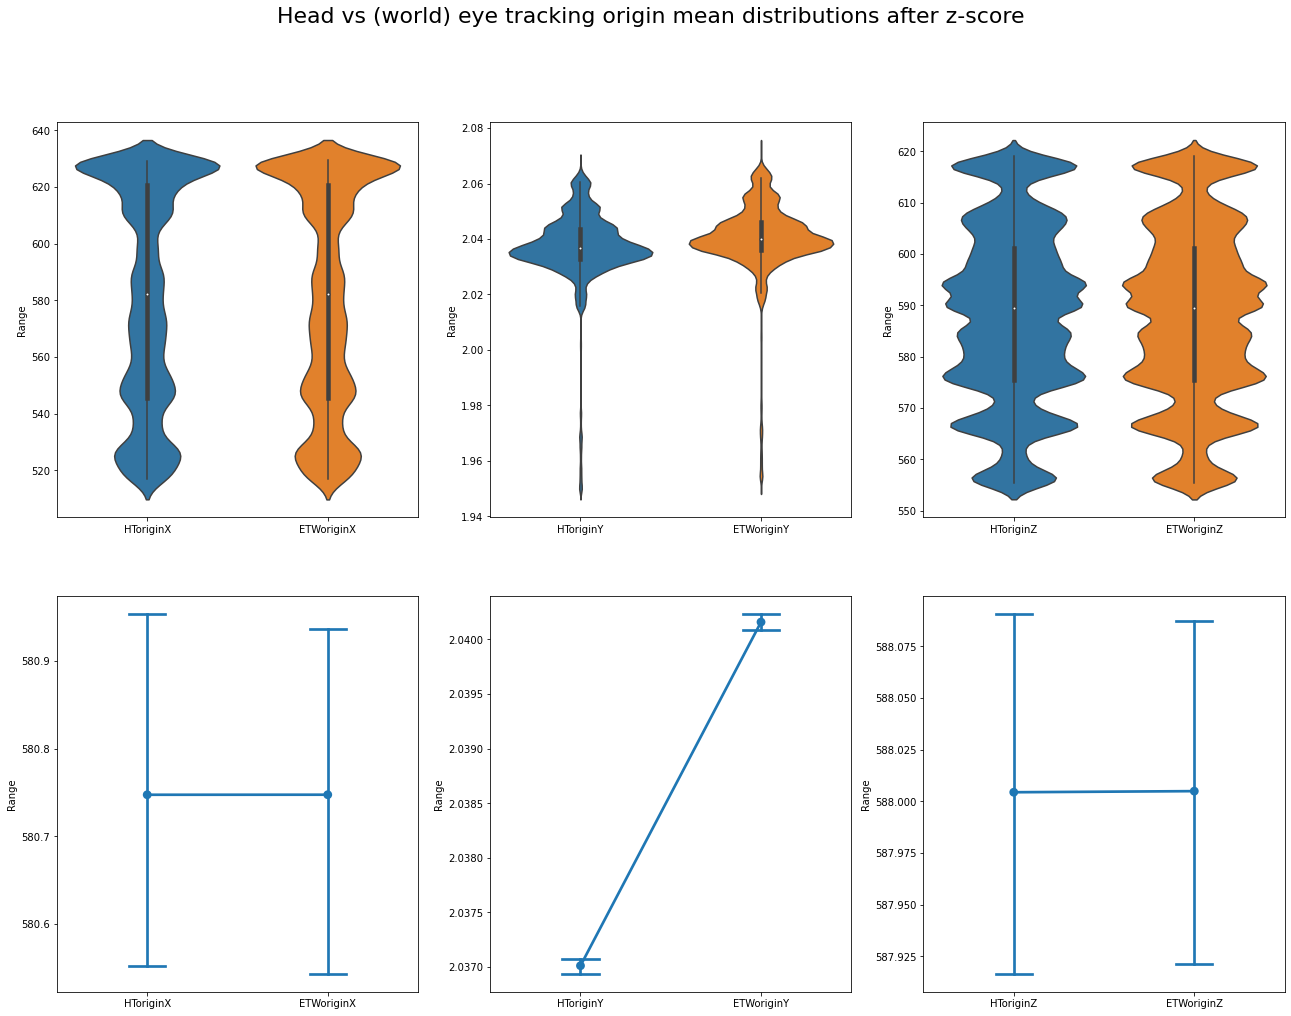

In [84]:
plot_origin_mean(filtered_df,"Head vs (world) eye tracking origin mean distributions after z-score", "origin_mean_distr_z_score")

Exploring means distributions for head vs eye tracking directions after zscores

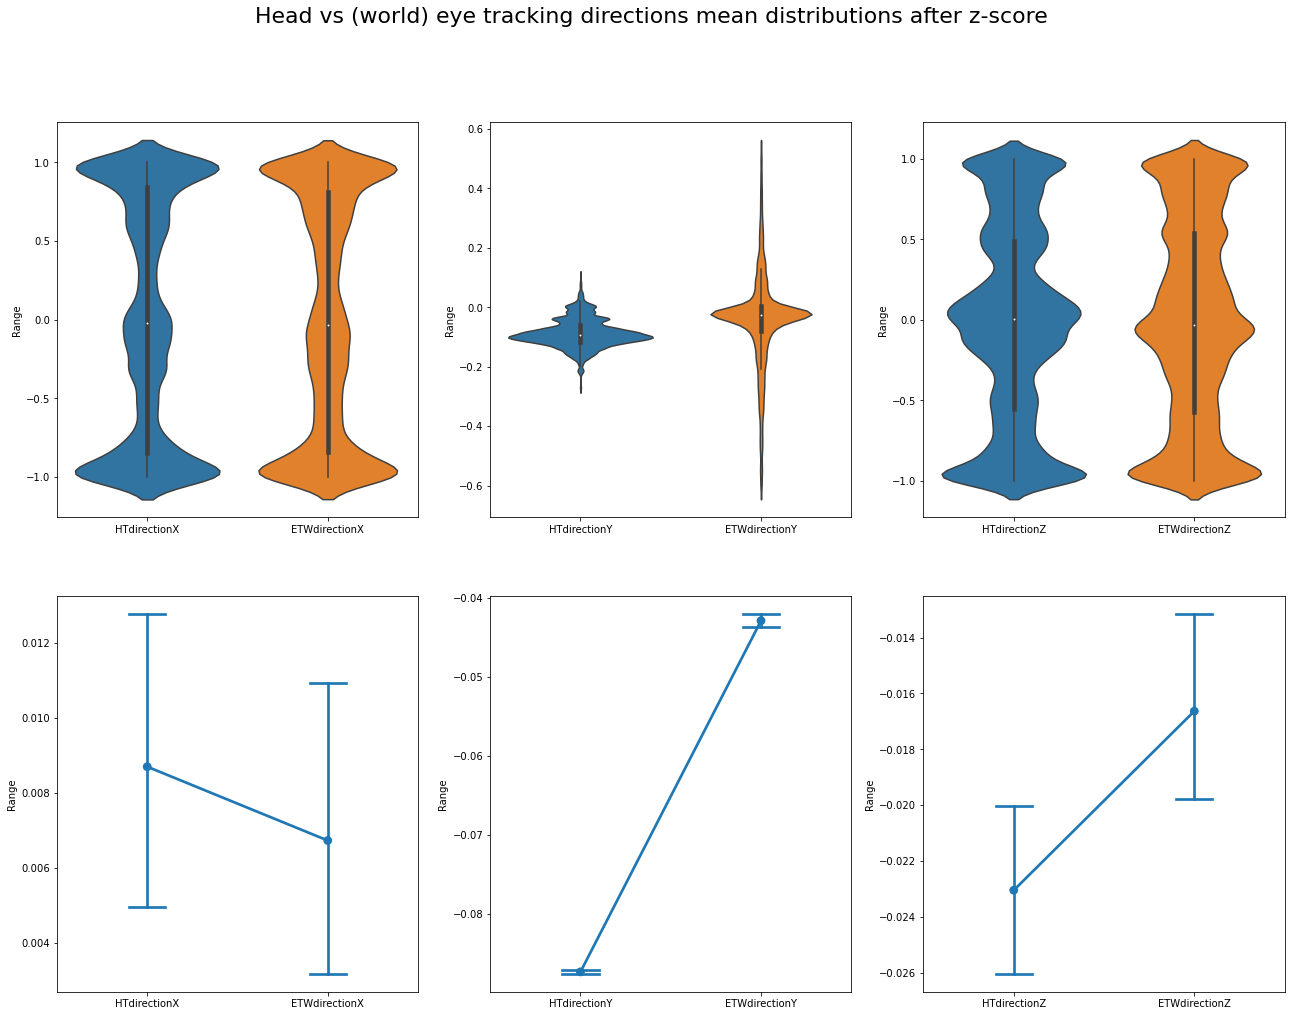

In [85]:
def plot_directions_mean(df, suptitle="", save_name=""):
    fig, ax = plt.subplots(2,3, figsize=(22, 16))

    fig.suptitle(suptitle, fontsize=22)

    # mean distributions comparing head to eye tracing
    sns.violinplot(data=df[['HTdirectionX','ETWdirectionX']], ax=ax[0,0])
    ax[0,0].set_ylabel('Range')
    sns.violinplot(data=df[['HTdirectionY', 'ETWdirectionY']], ax=ax[0,1])
    ax[0,1].set_ylabel('Range')
    sns.violinplot(data=df[['HTdirectionZ','ETWdirectionZ']], ax=ax[0,2])
    ax[0,2].set_ylabel('Range')

    # representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
    sns.pointplot(data=df[['HTdirectionX','ETWdirectionX']], capsize=.2, ax=ax[1,0])
    ax[1,0].set_ylabel('Range')
    sns.pointplot(data=df[['HTdirectionY', 'ETWdirectionY']],capsize=.2, ax=ax[1,1])
    ax[1,1].set_ylabel('Range')
    sns.pointplot(data=df[['HTdirectionZ','ETWdirectionZ']], capsize=.2, ax=ax[1,2])
    ax[1,2].set_ylabel('Range')

    # plt.savefig("Images/" + save_name + ".eps", format='eps', dpi=1200)

plot_directions_mean(filtered_df,"Head vs (world) eye tracking directions mean distributions after z-score", "direction_mean_distr_z_score" )

In [115]:
def plot_origin_relational(df, sample=True, n_sample=10000):

    if sample:
        # bahavioral axis relational distribution
        fig, ax = plt.subplots(3,1, figsize=(20, 12))

        fig.suptitle("Axis origin relational distribution through index/time. Sample: " + str(n_sample), fontsize=22)

        sns.lineplot(data=df[['HToriginX','ETWoriginX']].head(n_sample), ax=ax[0])
        ax[0].set_xlabel('Index/Time')
        ax[0].set_ylabel('Origin X')
        sns.lineplot(data=df[['HToriginY', 'ETWoriginY']].head(n_sample), ax=ax[1])
        ax[1].set_xlabel('Index/Time')
        ax[1].set_ylabel('Origin Y')
        sns.lineplot(data=df[['HToriginZ', 'ETWoriginZ']].head(n_sample), ax=ax[2])
        ax[2].set_xlabel('Index/Time')
        ax[2].set_ylabel('Origin Z')
        fig.subplots_adjust(hspace=0.4)
    else:
        # bahavioral axis relational distribution
        fig, ax = plt.subplots(3,1, figsize=(20, 12))

        fig.suptitle("Axis origin relational distribution through index/time. Sample: " + str(n_sample), fontsize=22)

        sns.lineplot(data=df[['HToriginX','ETWoriginX']], ax=ax[0])
        ax[0].set_xlabel('Index/Time')
        ax[0].set_ylabel('Origin X')
        sns.lineplot(data=df[['HToriginY', 'ETWoriginY']], ax=ax[1])
        ax[1].set_xlabel('Index/Time')
        ax[1].set_ylabel('Origin Y')
        sns.lineplot(data=df[['HToriginZ', 'ETWoriginZ']], ax=ax[2])
        ax[2].set_xlabel('Index/Time')
        ax[2].set_ylabel('Origin Z')
        fig.subplots_adjust(hspace=0.4)
    plt.savefig("Images/" + "axis_origin_relational_" + str(n_sample) + ".eps", format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


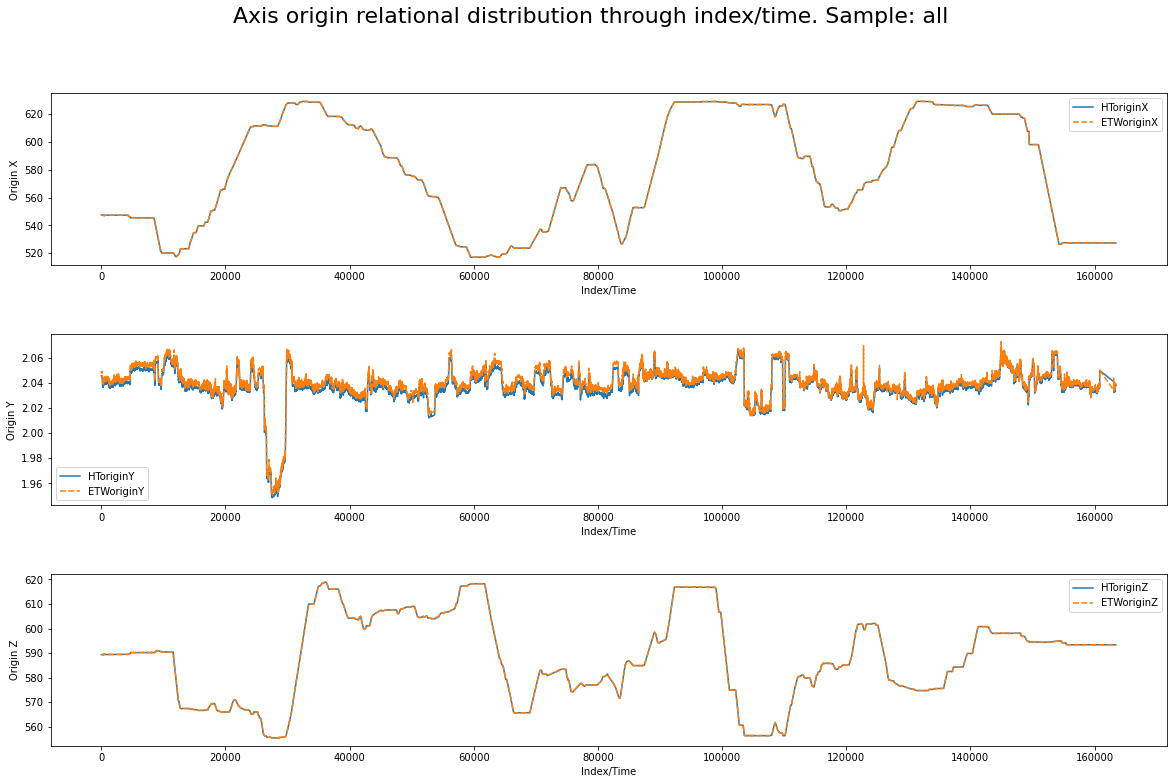

In [116]:
plot_origin_relational(filtered_df, sample=False, n_sample="all")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


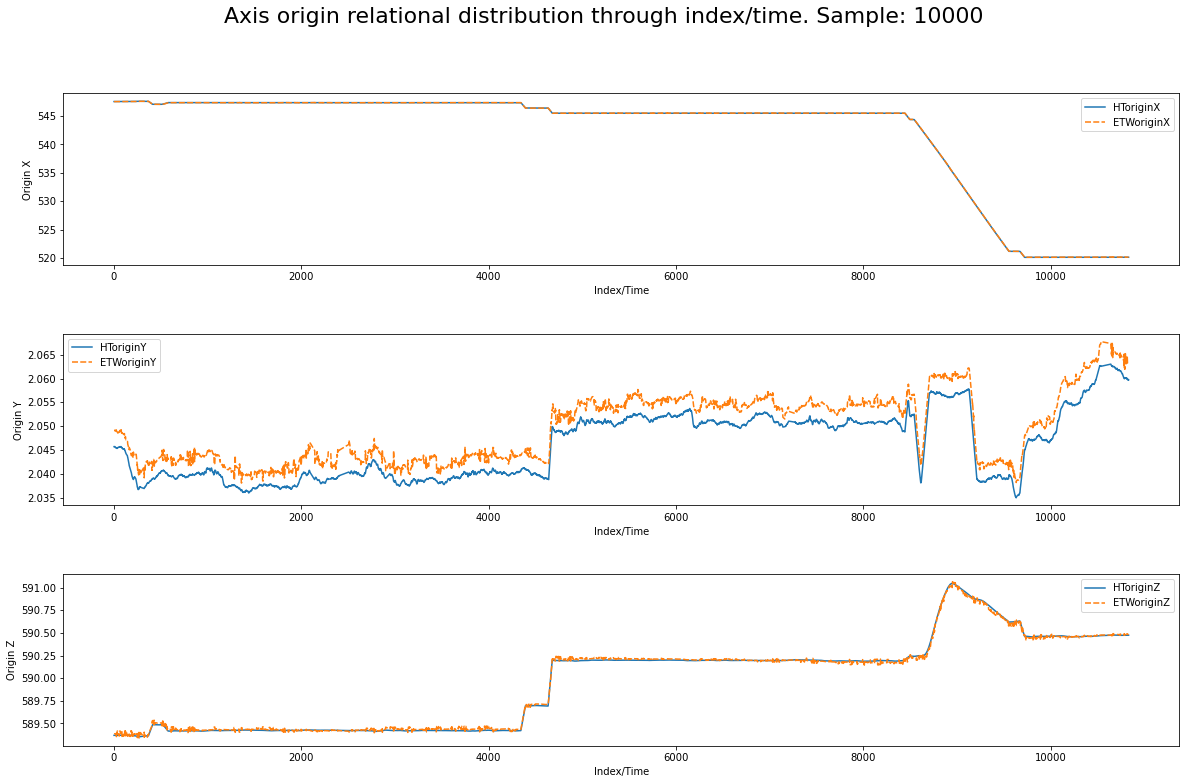

In [113]:
plot_origin_relational(filtered_df, sample=True)

In [117]:
def plot_direction_relational(df, sample=True, n_sample=10000):

    if sample:
        fig, ax = plt.subplots(3,1, figsize=(20, 12))

        fig.suptitle("Axis direction relational distribution through index/time. Sample: " + str(n_sample), fontsize=22)

        sns.lineplot(data=df[['HTdirectionX','ETWdirectionX']].head(n_sample), ax=ax[0])
        ax[0].set_xlabel('Index/Time')
        ax[0].set_ylabel('Direction X')
        sns.lineplot(data=df[['HTdirectionY', 'ETWdirectionY']].head(n_sample), ax=ax[1])
        ax[1].set_xlabel('Index/Time')
        ax[1].set_ylabel('Direction Y')
        sns.lineplot(data=df[['HTdirectionZ', 'ETWdirectionZ']].head(n_sample), ax=ax[2])
        ax[2].set_xlabel('Index/Time')
        ax[2].set_ylabel('Direction Z')
        fig.subplots_adjust(hspace=0.4)
    else:
        fig, ax = plt.subplots(3,1, figsize=(20, 12))
        fig.suptitle("Axis direction relational distribution through index/time. Sample: " + str(n_sample), fontsize=22)
        sns.lineplot(data=df[['HTdirectionX','ETWdirectionX']], ax=ax[0])
        ax[0].set_xlabel('Index/Time')
        ax[0].set_ylabel('Direction X')
        sns.lineplot(data=df[['HTdirectionY', 'ETWdirectionY']], ax=ax[1])
        ax[1].set_xlabel('Index/Time')
        ax[1].set_ylabel('Direction Y')
        sns.lineplot(data=df[['HTdirectionY', 'ETWdirectionY']], ax=ax[2])
        ax[2].set_xlabel('Index/Time')
        ax[2].set_ylabel('Direction Z')
        fig.subplots_adjust(hspace=0.4)
    plt.savefig("Images/" + "axis_direction_relational_" + str(n_sample) + ".eps", format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


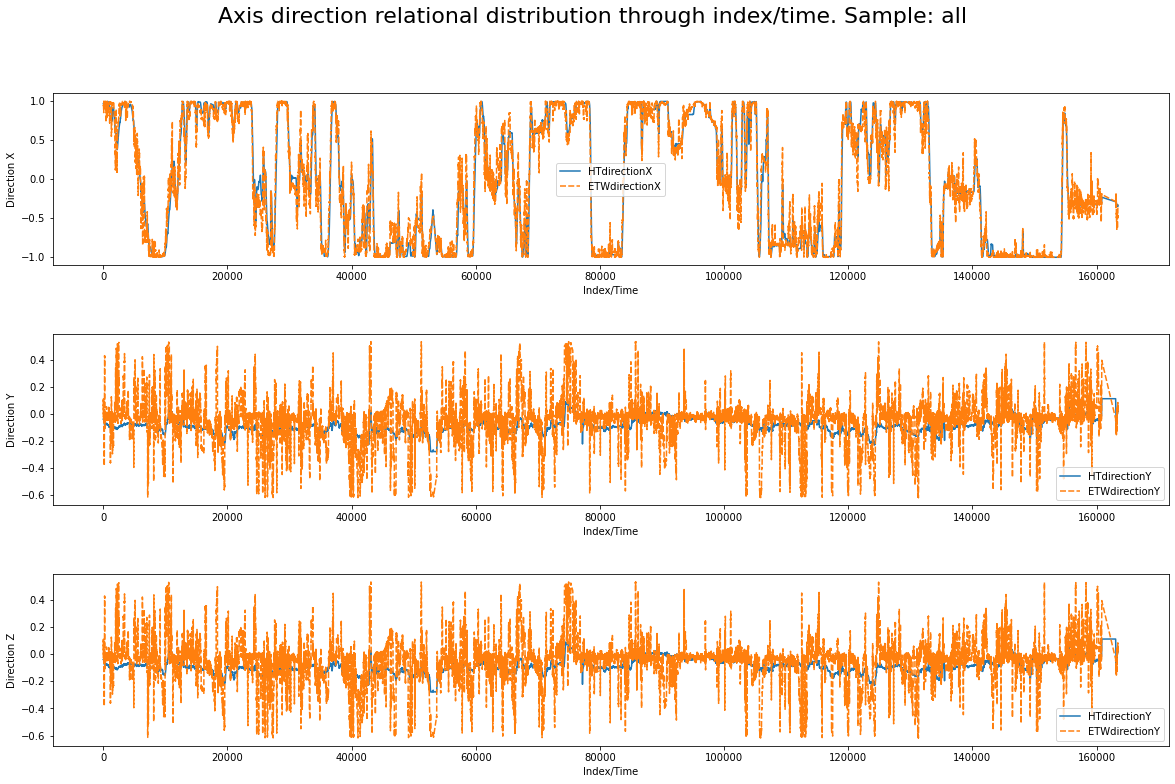

In [109]:
plot_direction_relational(filtered_df, sample=False, n_sample="all")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


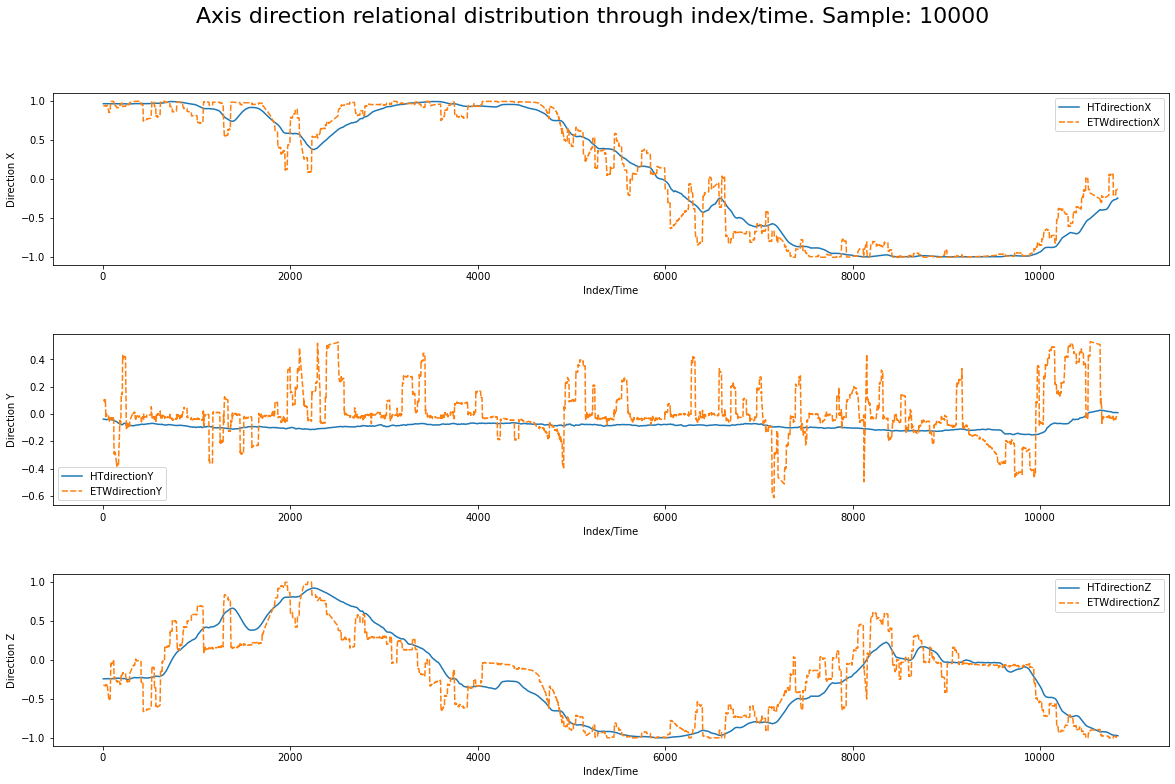

In [118]:
plot_direction_relational(filtered_df, sample=True)

In [154]:
# reset to new index
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,Unnamed: 0,valid,leftBlink,rightBlink,ETWTime,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,...,ETLoriginZ,ETLdirectionX,ETLdirectionY,ETLdirectionZ,HToriginX,HToriginY,HToriginZ,HTdirectionX,HTdirectionY,HTdirectionZ
0,0.103,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
1,0.105,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
2,0.106,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
3,0.107,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
4,0.108,1.0,0.0,0.0,58.685047,547.54376,2.049087,589.38650,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151734,2806.947,1.0,0.0,0.0,2865.602500,527.39570,2.039758,593.38170,-0.465525,0.053999,...,-0.030184,0.140884,0.020569,0.989807,527.346741,2.038607,593.383911,-0.341758,0.026704,-0.939409
151735,2806.958,1.0,0.0,0.0,2865.613500,527.39575,2.039808,593.38184,-0.466018,0.055140,...,-0.030173,0.140656,0.021255,0.989822,527.346741,2.038620,593.384033,-0.342585,0.026923,-0.939102
151736,2806.969,1.0,0.0,0.0,2865.624800,527.39570,2.040012,593.38245,-0.388782,0.076406,...,-0.030771,0.054550,0.033539,0.997940,527.346741,2.038561,593.384155,-0.343687,0.027117,-0.938693
151737,2806.980,1.0,0.0,0.0,2865.635500,527.39500,2.039536,593.38130,-0.349532,0.084078,...,-0.029431,0.011353,0.037384,0.999222,527.346741,2.038495,593.384338,-0.344554,0.027179,-0.938373


# 5. Convine CSV  files to include object names

In [3]:
hit_events_df = pd.read_csv('BehavioralData/HitEvents_new_02715e7a-5a68-471b-9e63-f056c5f0df81.csv')
hit_events_df

,HON,length,start,end,hits,distance
0,Validation_Plane (3),0.021,0.000,0.021,3,12.533
1,baum ld0(enhanced),0.184,0.103,0.287,23,52.303
2,streetLight2 (32),0.001,0.308,0.309,2,34.634
3,Col House1,0.002,0.330,0.332,2,119.621
4,PlantPot_A,0.202,0.352,0.554,17,53.100
...,...,...,...,...,...,...
15930,BridgeSlope_Simple (1),0.111,2806.414,2806.525,11,23.696
15931,builds (1),0.000,2806.536,2806.536,1,42.747
15932,BridgeSlope_Simple (1),0.000,2806.547,2806.547,1,23.485
15933,builds (1),0.000,2806.558,2806.558,1,43.116


In [5]:
total_hits = len(hit_events_df.index)
total_hits

15935

In [60]:
# calculating gaze events
g_length = 0.260
gaze = hit_events_df[hit_events_df['length'] > g_length]
# gaze = gaze[(gaze['HON'] != 'Lod_1') & (gaze['HON'] != 'Terrain')]
# there are 263 unique objects that were gazed at
# gaze['HON'].unique().size

# gaze.index.size
gaze

,HON,length,start,end,hits,distance
15,Lod_1,0.388,0.930,1.318,36,20.913
16,Terrain,0.556,1.329,1.885,39,5.302
21,Lod_1,0.522,2.196,2.718,48,22.159
27,Lod_1,0.577,3.218,3.795,16,20.876
32,Lod_1,0.834,3.950,4.784,76,21.305
...,...,...,...,...,...,...
15915,builds (1),1.022,2801.650,2802.672,76,47.539
15918,PlantPot_A (4),0.355,2802.927,2803.282,33,22.116
15919,Terrain,0.423,2803.293,2803.716,39,18.816
15923,Terrain,1.521,2803.771,2805.292,138,13.897


In [7]:
face_cond = gaze['HON'].str.contains('face', regex=False, na=False)
face_fixation = gaze[face_cond]
face_size = face_fixation.index.size
face_size

143

In [8]:
unique_face = pd.DataFrame(face_fixation['HON'].unique()) # 44 were unique faces
# face_fixation

int(unique_face.index.size)

44

In [9]:
total_hits = int(len(hit_events_df.index))
gazes = int(gaze.index.size)
total_faces = int(face_fixation.index.size)
unique_faces = int(unique_face.index.size)

In [19]:
# events_viz = pd.DataFrame({'Faces': [total_faces],
#                            'Other Gazes': [gazes - unique_faces],
#                            'Other Events': [total_hits - gazes]},
#                           index=['Hit events'])
# events_viz


In [23]:
events_viz = pd.DataFrame({'Hit_events': ['Face_gazes', 'Other_gazes', 'Other_events'],
                           'Total': [total_faces, gazes - total_faces, total_hits - gazes]})
events_viz

,Hit_events,Total
0,Face_gazes,143
1,Other_gazes,1507
2,Other_events,14285


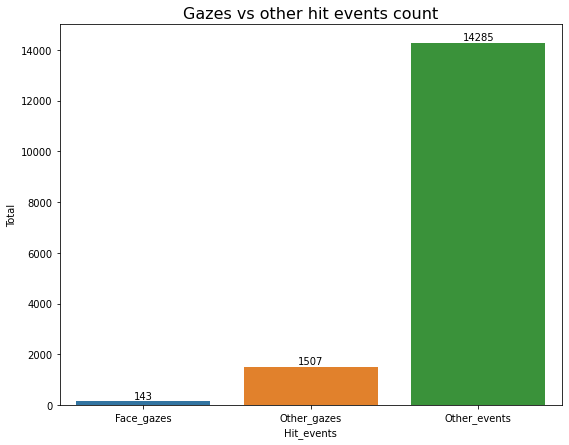

In [77]:
fig, ax = plt.subplots(1,1, figsize=(9, 7))

sns.barplot(y='Total',x='Hit_events', data=events_viz)

ax.bar_label(ax.containers[0],label_type='edge')
ax.set_title('Gazes vs other hit events count', fontsize=16)
plt.savefig("Images/hit_events_count.eps", format='eps', dpi=1200)

In [69]:
gaze_z_scores = scipy.stats.zscore(gaze[['distance']])
gaze_abs_zscores = np.abs(gaze_z_scores)

filtered_gaze_data = (gaze_abs_zscores < 3).all(axis = 1)


filtered_gaze_df = gaze[filtered_gaze_data]
filtered_gaze_df.reset_index(drop=True)

,HON,length,start,end,hits,distance
0,Lod_1,0.388,0.930,1.318,36,20.913
1,Terrain,0.556,1.329,1.885,39,5.302
2,Lod_1,0.522,2.196,2.718,48,22.159
3,Lod_1,0.577,3.218,3.795,16,20.876
4,Lod_1,0.834,3.950,4.784,76,21.305
...,...,...,...,...,...,...
1601,builds (1),1.022,2801.650,2802.672,76,47.539
1602,PlantPot_A (4),0.355,2802.927,2803.282,33,22.116
1603,Terrain,0.423,2803.293,2803.716,39,18.816
1604,Terrain,1.521,2803.771,2805.292,138,13.897


In [98]:
events_avg = pd.DataFrame({'avg_distance_all': hit_events_df['distance'],
                           'avg_distance_gaze': gaze['distance'],
                           'avg_distance_gaze_zscore':filtered_gaze_df['distance'],
                           'avg_distance_faces':face_fixation['distance']})

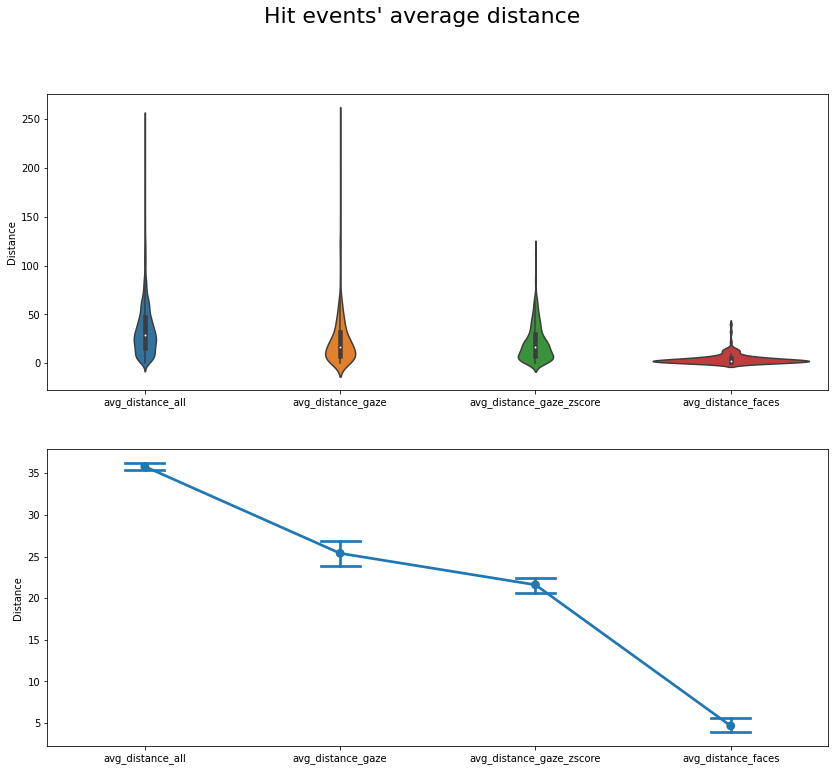

In [123]:
# average distance with and without outliers
avg_distance_all = hit_events_df[['distance']]
avg_distance_gaze = gaze[['distance']]
avg_distance_gaze_zscore = filtered_gaze_df[['distance']]

fig, ax = plt.subplots(2,1, figsize=(14, 12))

fig.suptitle("Hit events' average distance ", fontsize=22)

sns.violinplot(data=events_avg, ax=ax[0])
ax[0].set_ylabel('Distance')
sns.pointplot(data=events_avg, ax=ax[1], capsize=.2)
ax[1].set_ylabel('Distance')

# sns.violinplot(data=avg_distance_gaze, ax=ax[0,1])
# ax[0,1].set_ylabel('Range')
# sns.pointplot(data=avg_distance_gaze, ax=ax[1,1], capsize=.2)
# ax[1,1].set_ylabel('Range')
#
# sns.violinplot(data=avg_distance_gaze_zscore, ax=ax[0,2])
# ax[0,2].set_ylabel('Range')
# sns.pointplot(data=avg_distance_gaze_zscore, ax=ax[1,2], capsize=.2)
# ax[1,2].set_ylabel('Range')

# col_title = ['All hit events', 'Gaze events', 'Gaze events z-score']
# for i, ax in enumerate(ax.flatten()[:3]):
#     ax.set_title(col_title[i], fontweight='bold', fontsize=16)
#     i += 1

plt.savefig("Images/hits_average_distance.eps", format='eps', dpi=1200)

In [37]:
def match_object(x):
    #print(x)
    hit = gaze[(gaze['start'] <= x) & (x <= gaze['end'])]
    if hit.index.size > 0:
        #print(hit['HON'].values[0])
        return hit['HON'].values[0]

gazed_df = filtered_df
gazed_df['HitObject'] = gazed_df['Unnamed: 0'].map(match_object)
gazed_df_cleaned = gazed_df[['ETWoriginX', 'ETWoriginY', 'ETWoriginZ','ETWdirectionX','ETWdirectionY', 'ETWdirectionZ','HToriginX','HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY', 'HTdirectionZ', 'HitObject', 'Unnamed: 0']]

gazed_df_cleaned

,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,ETWdirectionZ,HToriginX,HToriginY,HToriginZ,HTdirectionX,HTdirectionY,HTdirectionZ,HitObject,Unnamed: 0
3,547.54376,2.049087,589.38650,0.942298,0.102535,-0.325898,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171,None,0.103
4,547.54376,2.049087,589.38650,0.942298,0.102535,-0.325898,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171,None,0.105
5,547.54376,2.049087,589.38650,0.942298,0.102535,-0.325898,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171,None,0.106
6,547.54376,2.049087,589.38650,0.942298,0.102535,-0.325898,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171,None,0.107
7,547.54376,2.049087,589.38650,0.942298,0.102535,-0.325898,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171,None,0.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163427,527.39570,2.039758,593.38170,-0.465525,0.053999,-0.884111,527.346741,2.038607,593.383911,-0.341758,0.026704,-0.939409,None,2806.947
163428,527.39575,2.039808,593.38184,-0.466018,0.055140,-0.883809,527.346741,2.038620,593.384033,-0.342585,0.026923,-0.939102,None,2806.958
163429,527.39570,2.040012,593.38245,-0.388782,0.076406,-0.919556,527.346741,2.038561,593.384155,-0.343687,0.027117,-0.938693,None,2806.969
163430,527.39500,2.039536,593.38130,-0.349532,0.084078,-0.934805,527.346741,2.038495,593.384338,-0.344554,0.027179,-0.938373,None,2806.980


In [11]:
# save dataframe (does not contain HON column
gazed_df_cleaned.to_csv('/Users/johnmadrid/GitHub/VillageBehavioralWalk/BehavioralData/behavioral.csv', index=False)

In [ ]:
fig, ax =plt.subplots(figsize=(20,12))

face_group = face_fixation.groupby(face_fixation['HON'] == 'face_81')

face_group
# sns.lineplot(data=face_fixation.head(20), x="HON", y="hits")

sns.scatterplot(data=face_fixation['distance'])


In [56]:
# fig, ax =plt.subplots(figsize=(20,12))
for i, v in enumerate(face_fixation['HON'].unique()):
    print(v)

face_81
face_37
face_30
face_422
face_627
face_43
face_619
face_613
face_4608
face_4609
face_480
face_412
face_4203
face_4208
face_4626
face_4627
face_4241
face_625
face_410
face_416
face_217
face_83
face_483
face_73
face_618
face_95
face_42
face_1
face_611
face_615
face_624
face_4605
face_4161
face_616
face_87
face_604
face_85
face_212
face_76
face_622
face_606
face_612
face_71
face_415
